## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_dir='/content/drive/MyDrive/Dataset/Training'

In [3]:
data_dir

'/content/drive/MyDrive/Dataset/Training'

## Import Libraries

In [4]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from torchvision import transforms,datasets

In [6]:
from torch.utils.data import DataLoader

In [7]:
from torchvision.io import read_image

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
import os

dataset_path = "/content/drive/MyDrive/Dataset/Training"  # Adjust if necessary

if os.path.exists(dataset_path):
    print("✅ Directory exists!")
    print("Contents:", os.listdir(dataset_path))  # List its contents
else:
    print("❌ Directory does NOT exist. Check the path!")


✅ Directory exists!
Contents: ['pituitary_tumor', 'meningioma_tumor', 'no_tumor', 'glioma_tumor']


## Load the image folders to dataset

In [10]:
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [11]:
transform = transforms.Compose([
    transforms.Resize((512)),
    transforms.CenterCrop(512),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [12]:
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In [13]:
dataset

Dataset ImageFolder
    Number of datapoints: 2870
    Root location: /content/drive/MyDrive/Dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=512, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(512, 512))
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [14]:
test_dataset=datasets.ImageFolder(root='/content/drive/MyDrive/Dataset/Testing', transform=transform)
test_dataset

Dataset ImageFolder
    Number of datapoints: 394
    Root location: /content/drive/MyDrive/Dataset/Testing
    StandardTransform
Transform: Compose(
               Resize(size=512, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(512, 512))
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

## Visualize the image

torch.Size([3, 512, 512])


Text(0.5, 1.0, 'Gliomma Tumor')

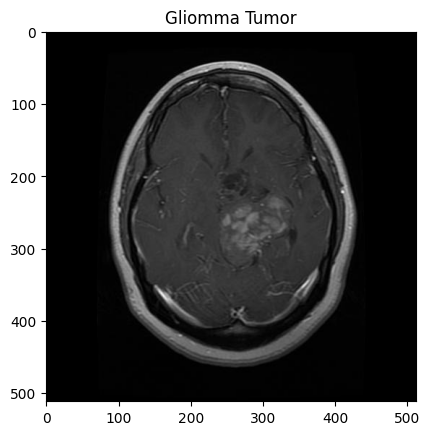

In [15]:

print(read_image('/content/drive/MyDrive/Dataset/Training/glioma_tumor/gg (1).jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/glioma_tumor/gg (1).jpg').permute(1,2,0))
plt.title("Gliomma Tumor")

torch.Size([3, 512, 512])


Text(0.5, 1.0, 'Meningioma Tumor')

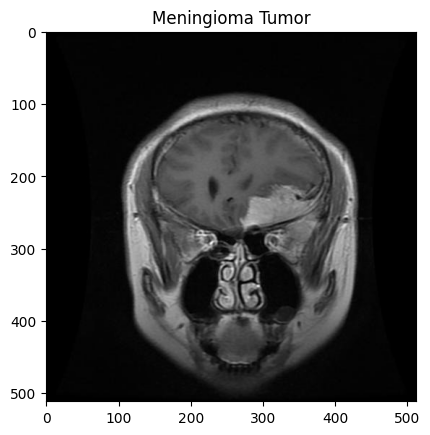

In [16]:
print(read_image('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (10).jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (10).jpg').permute(1,2,0))
plt.title("Meningioma Tumor")

torch.Size([3, 350, 350])


Text(0.5, 1.0, 'No Tumor')

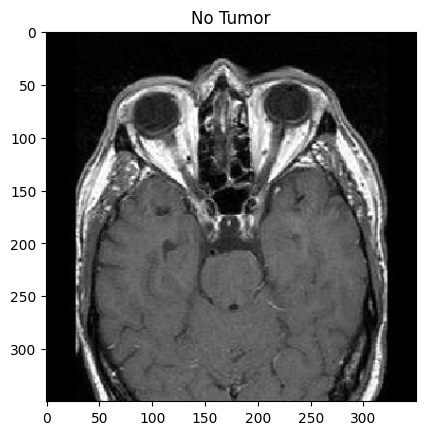

In [17]:
print(read_image('/content/drive/MyDrive/Dataset/Training/no_tumor/1.jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/no_tumor/1.jpg').permute(1,2,0))
plt.title("No Tumor")

torch.Size([3, 512, 512])


Text(0.5, 1.0, 'Pituitary Tumor')

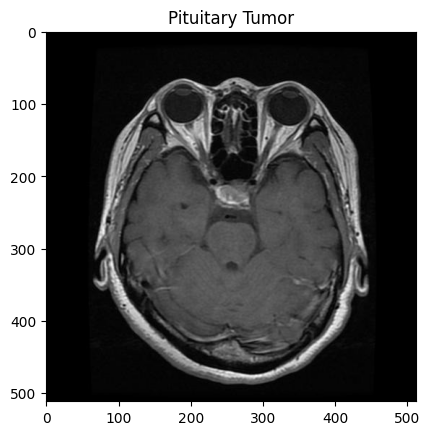

In [18]:
print(read_image('/content/drive/MyDrive/Dataset/Training/pituitary_tumor/p (1).jpg').shape)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/pituitary_tumor/p (1).jpg').permute(1,2,0))
plt.title("Pituitary Tumor")

Text(0.5, 1.0, 'Pituitary Tumor')

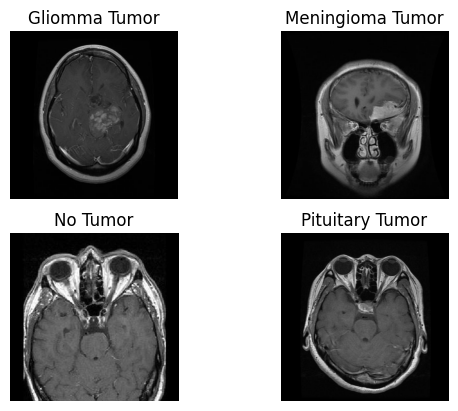

In [19]:
plt.subplot(2,2,1)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/glioma_tumor/gg (1).jpg').permute(1,2,0))
plt.axis('off')
plt.title("Gliomma Tumor")

plt.subplot(2,2,2)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (10).jpg').permute(1,2,0))
plt.axis('off')
plt.title("Meningioma Tumor")

plt.subplot(2,2,3)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/no_tumor/1.jpg').permute(1,2,0))
plt.axis('off')
plt.title("No Tumor")

plt.subplot(2,2,4)
plt.imshow(read_image('/content/drive/MyDrive/Dataset/Training/pituitary_tumor/p (1).jpg').permute(1,2,0))
plt.axis('off')
plt.title("Pituitary Tumor")

## Passing the Dataset to DataLoader


In [20]:
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader=DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2,pin_memory=True)

In [21]:
# Get one batch of images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Print batch shape
print("Image batch shape:", images.shape)  # Expected: (batch_size, channels, height, width)
print("Label batch shape:", labels.shape)  # Expected: (batch_size,)
print("Classes:", dataset.classes)  # Class names


Image batch shape: torch.Size([1, 3, 512, 512])
Label batch shape: torch.Size([1])
Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


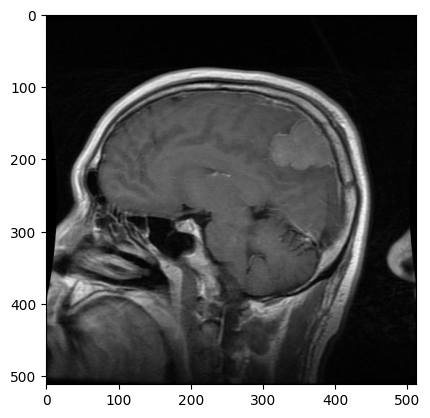

Label: meningioma_tumor


In [22]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show first image in the batch
imshow(images[0])
print("Label:", dataset.classes[labels[0].item()])

In [23]:
images.shape

torch.Size([1, 3, 512, 512])

## Defining the CNN Model


Image size is 3x512x512

In [24]:
class CNN_Model(nn.Module):

  def __init__(self):
    super().__init__()
      #Convolution Filter
    self.conv1=nn.Conv2d(in_channels=3,out_channels=96,kernel_size=11,stride=4)
    self.conv2=nn.Conv2d(in_channels=96,out_channels=256,kernel_size=5,stride=1)
    self.conv3=nn.Conv2d(in_channels=256,out_channels=384,kernel_size=3,stride=1)
    self.conv4=nn.Conv2d(in_channels=384,out_channels=384,kernel_size=3,stride=1)
    self.conv5=nn.Conv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1)
    # Max Pooling Filter
    self.maxpool1=nn.MaxPool2d(kernel_size=3,stride=2)

    #Fully Connected Layer -
    self.fc1=nn.Linear(in_features=10*10*256,out_features=9216)
    self.fc2=nn.Linear(in_features=9216,out_features=4096)
    self.fc3=nn.Linear(in_features=4096,out_features=4096)
    self.fc4=nn.Linear(in_features=4096,out_features=1000)
    self.fc5=nn.Linear(in_features=1000,out_features=4)


  def forward(self,X):
    # Conv & Max Pool
    X=F.relu(self.conv1(X))
    X=self.maxpool1(X)
    # Conv & Max Pool
    X=F.relu(self.conv2(X))
    X=self.maxpool1(X)
    # 2 Conv Filter followed by Max Pooll
    X=F.relu(self.conv3(X))
    X=F.relu(self.conv4(X))
    X=F.relu(self.conv5(X))
    X=self.maxpool1(X)

    # Flatten
    X=X.view(-1,10*10*256)

    # Fully Connected Layer
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=F.relu(self.fc3(X))
    X=F.relu(self.fc4(X))
    X=self.fc5(X)

    return F.log_softmax(X,dim=1)

In [25]:
model=CNN_Model()
model = model.to(device)

In [26]:
# Loss and Optimizer instantiation
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

# Training Model

# **Adam Optimizer**

## Batch Size = 1

In [27]:
import time
start_time=time.time()

epochs=10
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)
    b+=1
    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_losses.append(loss)
  train_correct.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Epoch: 0  Batch: 200  Loss: 1.2366313934326172
Epoch: 0  Batch: 400  Loss: 1.2638911008834839
Epoch: 0  Batch: 600  Loss: 1.3650641441345215
Epoch: 0  Batch: 800  Loss: 1.3464775085449219
Epoch: 0  Batch: 1000  Loss: 1.3228144645690918
Epoch: 0  Batch: 1200  Loss: 1.2908203601837158
Epoch: 0  Batch: 1400  Loss: 1.3862524032592773
Epoch: 0  Batch: 1600  Loss: 1.2721235752105713
Epoch: 0  Batch: 1800  Loss: 1.2475062608718872
Epoch: 0  Batch: 2000  Loss: 1.3339924812316895
Epoch: 0  Batch: 2200  Loss: 1.2504291534423828
Epoch: 0  Batch: 2400  Loss: 1.2020950317382812
Epoch: 0  Batch: 2600  Loss: 2.239455223083496
Epoch: 0  Batch: 2800  Loss: 1.3261204957962036
Epoch: 1  Batch: 200  Loss: 1.289149284362793
Epoch: 1  Batch: 400  Loss: 1.2424522638320923
Epoch: 1  Batch: 600  Loss: 1.1813775300979614
Epoch: 1  Batch: 800  Loss: 1.765384316444397
Epoch: 1  Batch: 1000  Loss: 1.244351863861084
Epoch: 1  Batch: 1200  Loss: 1.993730902671814
Epoch: 1  Batch: 1400  Loss: 1.2994554042816162
Epoch

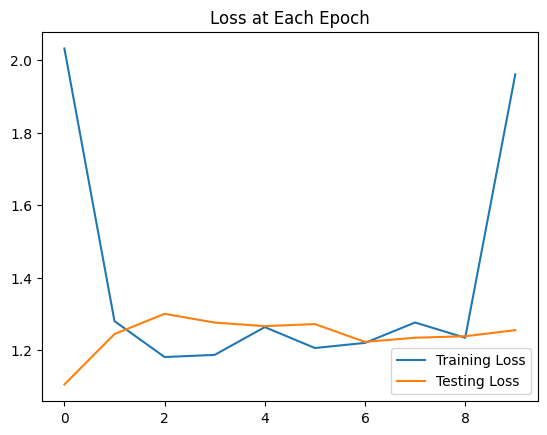

<Figure size 640x480 with 0 Axes>

In [31]:
train_losses_cpu = [loss.cpu().detach().numpy() for loss in train_losses]
test_losses_cpu = [loss.cpu().detach().numpy() for loss in test_losses]

plt.plot(train_losses_cpu, label="Training Loss")
plt.plot(test_losses_cpu, label="Testing Loss")
plt.title("Loss at Each Epoch")
plt.legend()
plt.show()

plt.savefig("Loss Batch 1 Adam.png")

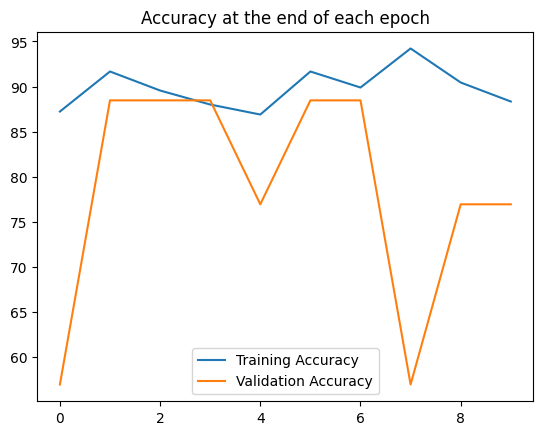

In [51]:
train_correct_cpu = [loss.cpu().detach().numpy() for loss in train_correct]
test_correct_cpu = [loss.cpu().detach().numpy() for loss in test_correct]

plt.plot([(t/len(train_dataloader))*10 for t in train_correct_cpu],label="Training Accuracy")
plt.plot([(t/len(test_dataloader))*10 for t in test_correct_cpu],label="Validation Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

plt.savefig("Accuracy Batch 1 Adam.png")

## Batch Size = 32

In [52]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2,pin_memory=True)


In [54]:
import time
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=10
train_losses_32=[]
test_losses_32=[]
train_correct_32=[]
test_correct_32=[]

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_losses_32.append(loss)
  train_correct_32.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_32.append(loss)
  test_correct_32.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

Total time taken to finish the training =6.76mins


## Batch Size = 64

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2,pin_memory=True)

In [ ]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=10
train_losses_64=[]
test_losses_64=[]
train_correct_64=[]
test_correct_64=[]

# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_losses_64.append(loss)
  train_correct_64.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_64.append(loss)
  test_correct_64.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

# Visualization


In [ ]:
train_losses_cpu = [loss.cpu().detach().numpy() for loss in train_losses]
test_losses_cpu = [loss.cpu().detach().numpy() for loss in test_losses]

plt.plot(train_losses_cpu, label="Training Loss")
plt.plot(test_losses_cpu, label="Testing Loss")
plt.title("Loss at Each Epoch - Adam Optimizer")
plt.legend()
plt.show()

plt.savefig("Loss Batch 1 Adam.png")


In [ ]:
train_correct_cpu = [loss.cpu().detach().numpy() for loss in train_correct]
test_correct_cpu = [loss.cpu().detach().numpy() for loss in test_correct]

plt.plot([(t/len(train_dataloader))*10 for t in train_correct_cpu],label="Training Accuracy")
plt.plot([(t/len(test_dataloader))*10 for t in test_correct_cpu],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - Adam Optimizer")
plt.legend()

plt.savefig("Accuracy Batch 1 Adam.png")

In [ ]:
train_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in train_losses_32]
test_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in test_losses_32]

plt.plot(train_losses_cpu_32, label="Training Loss")
plt.plot(test_losses_cpu_32, label="Testing Loss")
plt.title("Loss at Each Epoch - Adam Optimizer")
plt.legend()
plt.show()

plt.savefig("Loss Batch 32 Adam.png")

In [ ]:
train_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in train_correct_32]
test_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in test_correct_32]

plt.plot([(t/len(train_dataloader))*10 for t in train_correct_cpu_32],label="Training Accuracy")
plt.plot([(t/len(test_dataloader))*10 for t in test_correct_cpu_32],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - Adam Optimizer")
plt.legend()

plt.savefig("Accuracy Batch 32 Adam.png")

In [ ]:
train_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in train_losses_64]
test_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in test_losses_64]

plt.plot(train_losses_cpu_64, label="Training Loss")
plt.plot(test_losses_cpu_64, label="Testing Loss")
plt.title("Loss at Each Epoch - Adam Optimizer")
plt.legend()
plt.show()

plt.savefig("Loss Batch 64 Adam.png")

In [ ]:
train_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in train_correct_64]
test_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in test_correct_64]

plt.plot([(t/len(train_dataloader))*10 for t in train_correct_cpu_64],label="Training Accuracy")
plt.plot([(t/len(test_dataloader))*10 for t in test_correct_cpu_64],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - Adam Optimizer")
plt.legend()

plt.savefig("Accuracy Batch 64 Adam.png")

# **Stochastic Gradient Descent**


## Batch Size = 1

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2,pin_memory=True)

In [ ]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=10
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_losses.append(loss)
  train_correct.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

## Batch Size = 32

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2,pin_memory=True)

In [ ]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=10
train_losses_32=[]
test_losses_32=[]
train_correct_32=[]
test_correct_32=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_losses_32.append(loss)
  train_correct_32.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_32.append(loss)
  test_correct_32.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

## Batch Size = 64

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2,pin_memory=True)

In [ ]:
start_time=time.time()

del model
model=CNN_Model()
model = model.to(device)

epochs=10
train_losses_64=[]
test_losses_64=[]
train_correct_64=[]
test_correct_64=[]
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# for loop epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0


# train
  for b,(X_Train,y_train) in enumerate(train_dataloader):
    X_Train, y_train = X_Train.to(device), y_train.to(device)

    y_pred=model(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum()
    trn_corr+=batch_corr
#update parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_losses_64.append(loss)
  train_correct_64.append(trn_corr)

# Test

  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      y_val=model(X_test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum()
  loss=criterion(y_val,y_test)
  test_losses_64.append(loss)
  test_correct_64.append(tst_corr)


current_time=time.time()
total=current_time-start_time
print(f"Total time taken to finish the training ={round(total/60,2)}mins")

# Visualization

In [ ]:
train_losses_cpu = [loss.cpu().detach().numpy() for loss in train_losses]
test_losses_cpu = [loss.cpu().detach().numpy() for loss in test_losses]

plt.plot(train_losses_cpu, label="Training Loss")
plt.plot(test_losses_cpu, label="Testing Loss")
plt.title("Loss at Each Epoch")
plt.legend()
plt.show()

plt.savefig("Loss Batch 1 SGD.png")

In [ ]:
train_correct_cpu = [loss.cpu().detach().numpy() for loss in train_correct]
test_correct_cpu = [loss.cpu().detach().numpy() for loss in test_correct]

plt.plot([(t/len(train_dataloader))*10 for t in train_correct_cpu],label="Training Accuracy")
plt.plot([(t/len(test_dataloader))*10 for t in test_correct_cpu],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - SGD Optimizer")
plt.legend()

plt.savefig("Accuracy Batch 1 SGD.png")

In [ ]:
train_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in train_losses_32]
test_losses_cpu_32 = [loss.cpu().detach().numpy() for loss in test_losses_32]

plt.plot(train_losses_cpu_32, label="Training Loss")
plt.plot(test_losses_cpu_32, label="Testing Loss")
plt.title("Loss at Each Epoch - SGD Optimizer")
plt.legend()
plt.show()

plt.savefig("Loss Batch 32 SGD.png")

In [ ]:
train_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in train_correct_32]
test_correct_cpu_32 = [loss.cpu().detach().numpy() for loss in test_correct_32]

plt.plot([(t/len(train_dataloader))*10 for t in train_correct_cpu_32],label="Training Accuracy")
plt.plot([(t/len(test_dataloader))*10 for t in test_correct_cpu_32],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - SGD Optimizer")
plt.legend()

plt.savefig("Accuracy Batch 32 SGD.png")

In [ ]:
train_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in train_losses_64]
test_losses_cpu_64 = [loss.cpu().detach().numpy() for loss in test_losses_64]

plt.plot(train_losses_cpu_64, label="Training Loss")
plt.plot(test_losses_cpu_64, label="Testing Loss")
plt.title("Loss at Each Epoch - SGD Optimizer")
plt.legend()
plt.show()

plt.savefig("Loss Batch 64 SGD.png")

In [ ]:
train_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in train_correct_64]
test_correct_cpu_64 = [loss.cpu().detach().numpy() for loss in test_correct_64]

plt.plot([(t/len(train_dataloader))*10 for t in train_correct_cpu_64],label="Training Accuracy")
plt.plot([(t/len(test_dataloader))*10 for t in test_correct_cpu_64],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch - SGD Optimizer")
plt.legend()

plt.savefig("Accuracy Batch 64 SGD.png")

In [59]:
ls

drive/  sample_data/
